## Trotter error extrapolation

In [ ]:
from py_alf import Simulation

This loop generates 3 different simulations, one for each $\tau\in\{0.05,0.1,0.15\}$.

In [ ]:
import os
sims = [
    Simulation(
        'Hubbard',
        {
            'L1': 6,
            'L2': 6,
            'Checkerboard': b1,
            'Symm': b2,
            'Ham_T': 1.0,
            'Ham_U': 4.0,
            'Ham_Tperp': 4.0,
            'beta': 5.0,
            'Ltau': 0,
            'NSweep': 100,
            'NBin': 10,
            'Dtau': dtau,
            'Mz': True
        },
        branch='ALF-2.2',
        alf_dir=os.getenv('ALF_DIR', './ALF')  # ,
        # mpi=True,
        # n_mpi=4
    )
    for dtau in [0.05, 0.1, 0.15] for b2 in [True, False] for b1 in [True, False]]

sims[0].compile()  # this is only needed if no crutial changes in sim dict have been made

In [ ]:
for sim in sims:
    sim.run()

In [ ]:
import numpy as np
import contextlib
import pandas as pd
df = pd.DataFrame(columns=['E', 'dE', 'dtau', 'cb', 's'])
for sim in sims:
    dict = sim.sim_dict
    obs = sim.get_obs()
    dtau = dict['Dtau']
    cb = dict['Checkerboard']
    s = dict['Symm']
    val = obs['Ener_scalJ']['obs'][0,0]
    err = obs['Ener_scalJ']['obs'][0,1]
    df = df.append({'E': val, 'dE': err, 'dtau': dtau, 'cb': cb, 's': s}, ignore_index=True)

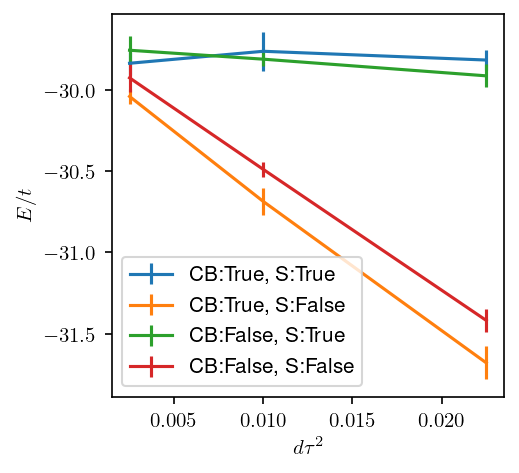

In [130]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
mpl.rcParams['figure.dpi'] = 150
figsize=np.asarray(((3+3/8), (3+3/8)))

plt.figure(figsize=figsize)
ax = plt.subplot()
for b1 in [True, False]:
    for b2 in [True, False]:
        data = df[(df['cb']==b1) & (df['s']==b2)]
        ax.errorbar(data['dtau']**2, data['E'], data['dE'], label=f"CB:{b1}, S:{b2}")
ax.legend()
ax.set_xlabel('$d\\tau^2$')
ax.set_ylabel('$E/t$')
plt.show()